In [542]:
#패키지 불러오기 
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn import model_selection 
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing
from tqdm import tqdm_notebook


In [543]:
#데이터 프레임으로 데이터 읽어오기 =
df = pd.read_csv("data/weather.csv")
print(df.shape)
df.head()

(366, 22)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29.0,1019.7,1015.0,7.0,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,NaN,9.7,ENE,39.0,E,W,4.0,...,36.0,1012.4,1008.4,NaN,3,17.5,25.7,Yes,3.6,Yes
2,13.7,NaN,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69.0,1009.5,1007.2,8.0,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56.0,1005.5,1007.0,2.0,7,NaN,14.1,Yes,2.8,Yes
4,NaN,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49.0,1018.3,1018.5,7.0,7,11.1,15.4,Yes,0.0,No


In [544]:
#필요없는 칼럼제거 
df=df.drop(['Evaporation','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','Pressure9am','Pressure3pm','WindSpeed3pm','RISK_MM','Temp9am','Temp3pm','MinTemp','MaxTemp','Cloud9am','Cloud3pm','Humidity9am','Humidity3pm'],axis=1)
#제거확인 
df

,Rainfall,Sunshine,RainToday,RainTomorrow
0,0.0,6.3,No,Yes
1,3.6,9.7,Yes,Yes
2,3.6,3.3,Yes,Yes
3,39.8,9.1,Yes,Yes
4,2.8,10.6,Yes,No
...,...,...,...,...
361,0.0,12.1,No,No
362,0.0,12.7,No,No
363,0.0,5.3,No,No
364,0.0,7.1,No,No


In [545]:
#전처리: 진위형 변수로 변형 
df["RainTomorrow"] = df.RainTomorrow.map({"Yes":0,"No":1})
df["RainToday"] = df.RainToday.map({"Yes":0,"No":1})

#변수 변형 확인 
df

,Rainfall,Sunshine,RainToday,RainTomorrow
0,0.0,6.3,1,0
1,3.6,9.7,0,0
2,3.6,3.3,0,0
3,39.8,9.1,0,0
4,2.8,10.6,0,1
...,...,...,...,...
361,0.0,12.1,1,1
362,0.0,12.7,1,1
363,0.0,5.3,1,1
364,0.0,7.1,1,1


In [546]:
#결속치 확인 
df.isnull().sum()

Rainfall        1
Sunshine        3
RainToday       0
RainTomorrow    0
dtype: int64

In [547]:
#중간값으로 결속치 채워주기 
df.Sunshine.fillna(df.Sunshine.median(),inplace=True)
df.Sunshine.fillna(df.Rainfall.median(),inplace=True)
#df.Humidity3pm.fillna(df.Humidity3pm.median(),inplace=True)
#df.Humidity9am.fillna(df.Humidity9am.median(),inplace=True)
df.Rainfall.fillna(df.Rainfall.median(),inplace=True)
df.Rainfall.fillna(df.RainTomorrow.median(),inplace=True)


##df = df.astype({'Humidity3pm': 'int'})
df = df.astype({'Sunshine': 'int'})
df = df.astype({'RainTomorrow': 'int'})
df = df.astype({'Rainfall': 'int'}) ## 소수점으로 나온거를 int로 바꾸어 준다 float -> int




#중간값으로 채운 결속치 확인 
df

,Rainfall,Sunshine,RainToday,RainTomorrow
0,0,6,1,0
1,3,9,0,0
2,3,3,0,0
3,39,9,0,0
4,2,10,0,1
...,...,...,...,...
361,0,12,1,1
362,0,12,1,1
363,0,5,1,1
364,0,7,1,1


In [548]:
#input 변수와 Output 변수 구분 
X=np.array(df.iloc[:,:-1])
y=np.array(df['RainTomorrow'])

In [549]:
X

array([[ 0,  6,  1],
       [ 3,  9,  0],
       [ 3,  3,  0],
       ...,
       [ 0,  5,  1],
       [ 0,  7,  1],
       [ 0, 12,  1]])

In [550]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [551]:
#트레이닝 세트와 테스트 세트로 데이터 구분 (여기서는 7:3으로 구분해준다)
from sklearn.model_selection import train_test_split

#randomstate는 반복적으로 같은 결과를 만들어 내기 위하여 설정해준다 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

X_train 크기: (256, 3)
y_train 크기: (256,)
X_test 크기: (110, 3)
y_test 크기: (110,)


In [552]:
#의사결정나무 모델에 데이터 적합(fitting)
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0,max_depth=12)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=12, random_state=0)

In [553]:
temp_y_pred = tree.predict(X_test)
#Training 값을 X_test에서 넣음 
print('예측값\n',temp_y_pred)
print('실제값\n',y_test)

예측값
 [1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1]
실제값
 [1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1]


In [554]:
#정확도 계산 
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix 

temp_acc = accuracy_score(y_test,temp_y_pred)

#y_test와 temp_y_pred로 예측한 값을 적용하여 temp_Acc로 추출함 
print('정확도:',format(temp_acc))

정확도: 0.7636363636363637


In [555]:
#오차행렬 (confusion matrix)
print(confusion_matrix(y_test,temp_y_pred))

[[ 5 15]
 [11 79]]


In [556]:
#모델 성능 
print(classification_report(y_test, (tree.predict(X_test) > 0.5)))

              precision    recall  f1-score   support

           0       0.31      0.25      0.28        20
           1       0.84      0.88      0.86        90

    accuracy                           0.76       110
   macro avg       0.58      0.56      0.57       110
weighted avg       0.74      0.76      0.75       110



In [514]:
train_scores, test_scores = list(),list ()
#Train_scroe와 test_score의 정확도를 저장할 장소 
#Train_score는 훈련데이터에 특화될수록 증가 
#Test_score는 테스트데이터에 일반화될수록 증가 

In [515]:
#의사결정 나무 모델의 depth 조절 (1에서 19까지)
for i in range(1,20):
    DT1 = DecisionTreeClassifier (max_depth =i)
    #깊이를 증가시키면서 의사결정나무 모델 적합 
    DT1.fit(X_train,y_train)
    
    #training dataset 정확도 평가 
    train_att = DT1.predict(X_train)
    train_acc=accuracy_score(y_train, train_att)
    train_scores.append(train_acc)
    
    #test dataset 정확도 평가 
    test_att = DT1.predict(X_test)
    test_acc = accuracy_score(y_test,test_att)
    test_scores.append(test_acc)
    
    #train 정확도와 test 정확도를 depth 개수에 따른 정확도 확인
    print('>%d, train: %.3f,test:%3f'%(i,train_acc,test_acc))

>1, train: 0.820,test:0.818182
>2, train: 0.832,test:0.809091
>3, train: 0.836,test:0.827273
>4, train: 0.852,test:0.818182
>5, train: 0.852,test:0.818182
>6, train: 0.867,test:0.772727
>7, train: 0.875,test:0.745455
>8, train: 0.887,test:0.772727
>9, train: 0.891,test:0.763636
>10, train: 0.891,test:0.763636
>11, train: 0.891,test:0.763636
>12, train: 0.891,test:0.763636
>13, train: 0.891,test:0.763636
>14, train: 0.891,test:0.763636
>15, train: 0.891,test:0.763636
>16, train: 0.891,test:0.763636
>17, train: 0.891,test:0.763636
>18, train: 0.891,test:0.763636
>19, train: 0.891,test:0.763636


/var/folders/nz/160bjb610xj3r4wkpjkgnw940000gn/T/ipykernel_4430/2923281947.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm_notebook(range(1, 20)):


  0%|          | 0/19 [00:00<?, ?it/s]

depth = 1 done.
depth = 2 done.
depth = 3 done.
depth = 4 done.
depth = 5 done.
depth = 6 done.
depth = 7 done.
depth = 8 done.
depth = 9 done.
depth = 10 done.
depth = 11 done.
depth = 12 done.
depth = 13 done.
depth = 14 done.
depth = 15 done.
depth = 16 done.
depth = 17 done.
depth = 18 done.
depth = 19 done.


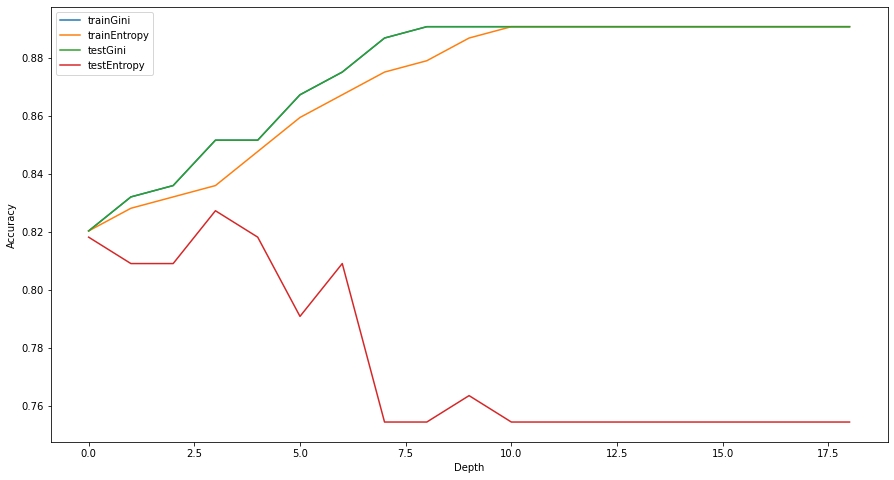

시험 데이터의 정확도 = 0.7636
최적 트리의 depth = 9


In [516]:
trainGini = []
testGini = []
trainEntropy = []
testEntropy = []
depth = []

for k in tqdm_notebook(range(1, 20)):
    dt = DecisionTreeClassifier(criterion='gini', max_depth=k)
    dt.fit(X_train, y_train)
    
    trainGini.append(dt.score(X_train, y_train))
    testGini.append(dt.score(X_train, y_train))
    
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=k)
    dt.fit(X_train, y_train)
    
    trainEntropy.append(dt.score(X_train, y_train))
    testEntropy.append(dt.score(X_test, y_test))
    
    depth.append(k)
    print('depth = %d done.' % k)

plt.figure(figsize=(15, 8))
plt.plot(trainGini, label='trainGini')
plt.plot(trainEntropy, label='trainEntropy')
plt.plot(testGini, label='testGini')
plt.plot(testEntropy, label='testEntropy')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

# 정확도가 가장 큰 최적의 depth를 찾는다
nDepth = depth[np.argmax(testGini)]

# opt_alpha를 적용한 tree를 사용한다.
dt = DecisionTreeClassifier(max_depth = nDepth)
dt.fit(X_train, y_train)
print('시험 데이터의 정확도 = %.4f' % dt.score(X_test, y_test))
print('최적 트리의 depth = %d' % nDepth)

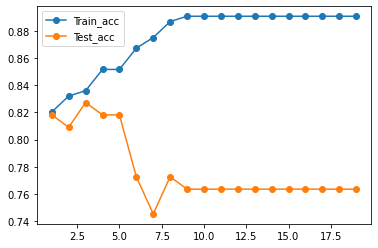

In [517]:
from matplotlib import pyplot
pyplot.plot(range(1,20),train_scores,'-o',label="Train_acc")
pyplot.plot(range(1,20),test_scores,'-o',label="Test_acc")
pyplot.legend()
pyplot.show()

#최적의 의사결정나무 깊이는 1

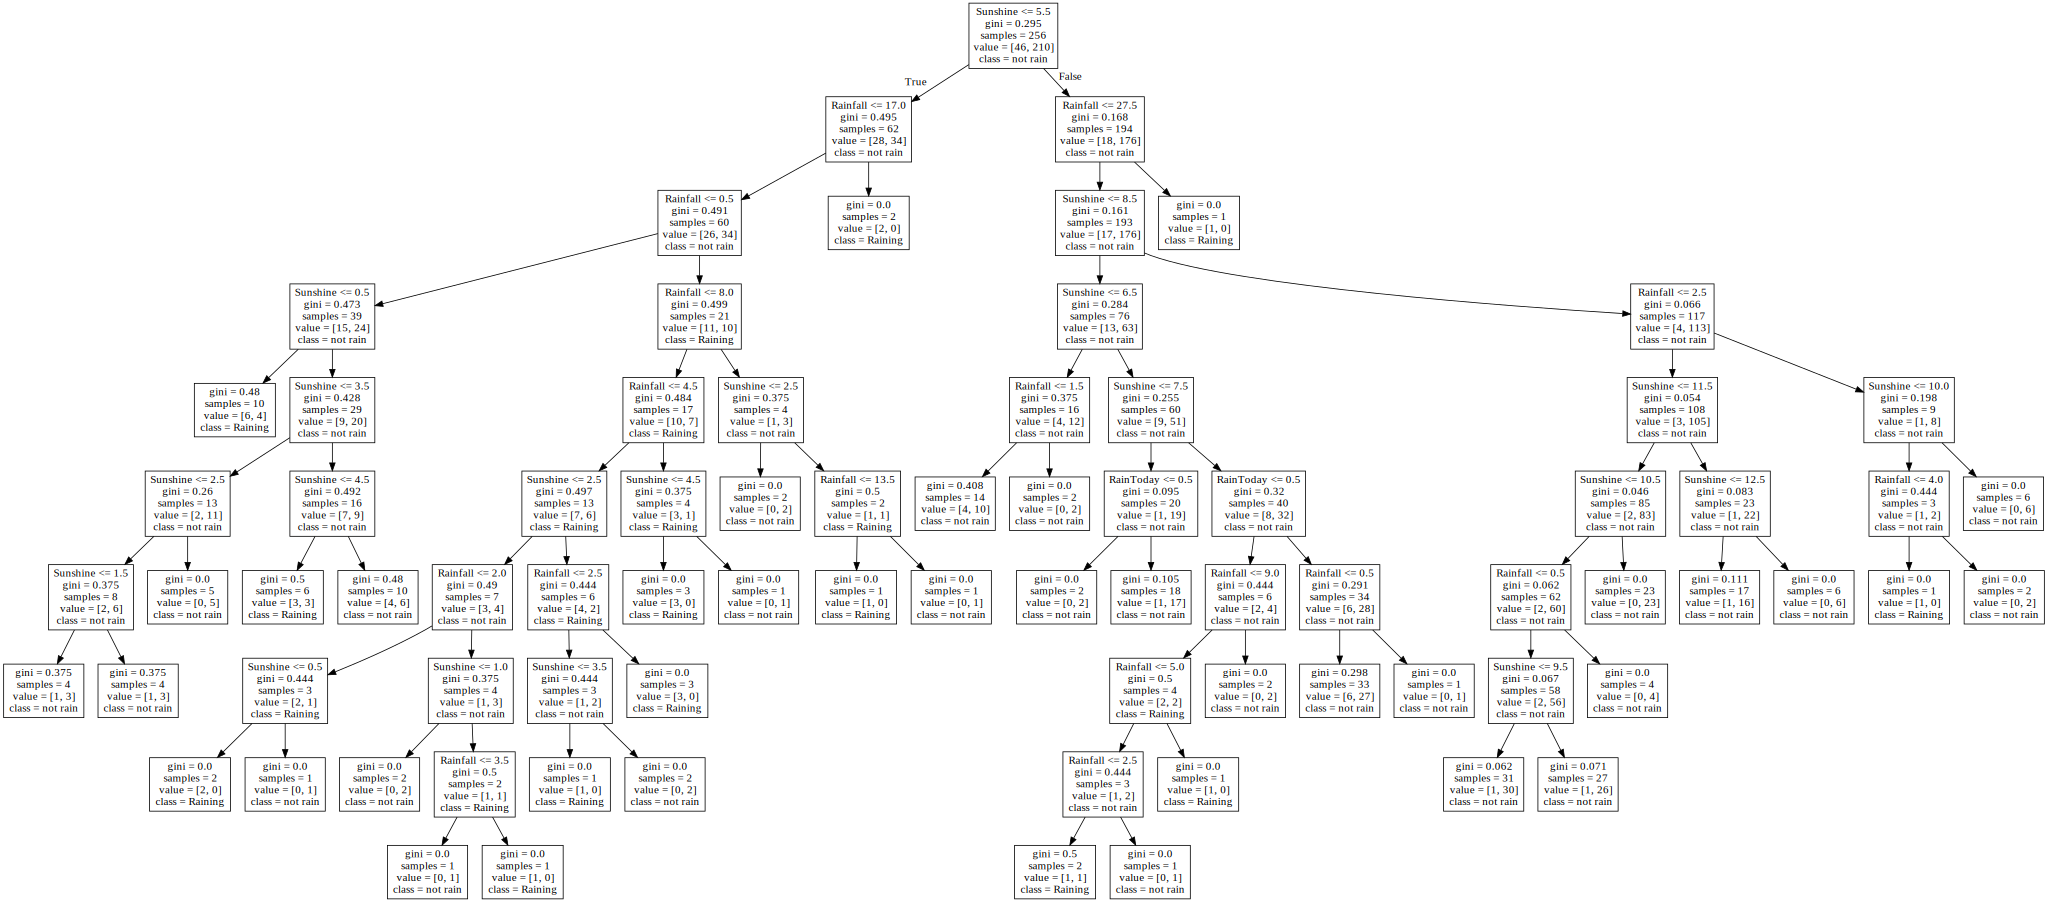

In [518]:
#트리시각화

import graphviz 
from sklearn.tree import export_graphviz

feature_name=['Rainfall','Sunshine','RainToday']

tree = export_graphviz(tree,feature_names=feature_name,
                       class_names = ["Raining","not rain"])

graphviz.Source(tree)

In [ ]:
#중간값으로 결속치 채워주기 


df.Open.fillna(df.Open.median(),inplace=True)
df.High.fillna(df.High.median(),inplace=True)
df.Low.fillna(df.Low.median(),inplace=True)
df.Close.fillna(df.Close.median(),inplace=True)
df.Volume.fillna(df.Volume.median(),inplace=True)
df.AdjClose.fillna(df.AdjClose.median(),inplace=True)